In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as po
import plotly.express as px
import matplotlib.pyplot as plt
import datetime as dt
from plotly.subplots import make_subplots
from calendar import month_name
from datetime import time, timedelta 

In [2]:
prod = pd.read_csv('product_data.csv')
prod.head(7)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff


In [3]:
orders = pd.read_csv("order_data.csv")
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.head(7)

,order_id,order_item_id,customer_unique_id,product_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,af861d436cfc08b2c2ddefd0ba074622,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,64b576fb70d441e8f1b2d7d446e483c5,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,199.90,18.14,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,85c835d128beae5b4ce8602c491bf385,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,delivered,2017-05-15 21:42:34,2017-05-22 13:44:35,2017-06-06,21.90,12.69,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,635d9ac1680f03288e72ada3a1035803,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,delivered,2017-12-10 11:53:48,2017-12-18 22:03:38,2018-01-04,19.90,11.85,31.75


In [4]:
rv = pd.read_csv('product_review_score.csv')
rv['review_creation_date'] = pd.to_datetime(rv['review_creation_date'])
rv.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01


In [5]:
deli = pd.read_csv("delivery_data.csv", date_parser='order_purchase_timestamp')
deli['order_purchase_timestamp'] = pd.to_datetime(deli['order_purchase_timestamp'])
deli['order_delivered_customer_date'] = pd.to_datetime(deli['order_delivered_customer_date'])
deli['order_estimated_delivery_date'] = pd.to_datetime(deli['order_estimated_delivery_date'])
deli.head()

,order_id,customer_unique_id,seller_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,seller_city,customer_city,seller_lat,seller_lng,customer_lat,customer_lng
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,48436dade18ac8b2bce089ec2a041202,2017-09-13 08:59:00,2017-09-20 23:43:00,2017-09-29,volta redonda,campos dos goytacazes,-22.496953,-44.127492,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,dd7ddc04e1b6c2c614352b383efe2d36,2017-04-26 10:53:00,2017-05-12 16:04:00,2017-05-15,sao paulo,santa fe do sul,-23.565096,-46.518565,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,5b51032eddd242adc84c38acab88f23d,2018-01-14 14:33:00,2018-01-22 13:19:00,2018-02-05,borda da mata,para de minas,-22.262584,-46.171124,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,9d7a1d34a5052409006425275ba1c2b4,2018-08-08 10:00:00,2018-08-14 13:32:00,2018-08-20,franca,atibaia,-20.553624,-47.387359,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,df560393f3a51e74553ab94004ba5c87,2017-02-04 13:57:00,2017-03-01 16:42:00,2017-03-17,loanda,varzea paulista,-22.929384,-53.135873,-23.243402,-46.827614


In [6]:
detail = pd.merge(
    left = orders,
    right = prod,
    on = "product_id",
    how ="inner"
)
detail.head()


,order_id,order_item_id,customer_unique_id,product_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,58.9,13.29,72.19,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,0fb8e3eab2d3e79d92bb3fffbb97f188,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-06-28 11:52:20,2017-07-13 20:39:29,2017-07-26,55.9,17.96,73.86,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,3419052c8c6b45daf79c1e426f9e9bcb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2018-05-18 10:25:53,2018-06-04 18:34:26,2018-06-07,64.9,18.33,83.23,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,e7c828d22c0682c1565252deefbe334d,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-08-01 18:38:42,2017-08-09 21:26:33,2017-08-25,58.9,16.17,75.07,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,0bb98ba72dcc08e95f9d8cc434e9a2cc,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-08-10 21:48:40,2017-08-24 20:04:21,2017-09-01,58.9,13.29,72.19,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [7]:
sales_catg = detail[[
    'price',
    'freight_value',
    'product_category_name_english'
]].groupby('product_category_name_english').sum().sort_values('price', ascending = False).reset_index()[0:10]
sales_catg

,product_category_name_english,price,freight_value
0,health_beauty,1258681.34,182566.73
1,watches_gifts,1205005.68,100535.93
2,bed_bath_table,1036988.68,204693.04
3,sports_leisure,988048.97,168607.51
4,computers_accessories,911954.32,147318.08
5,furniture_decor,729762.49,172749.30
6,cool_stuff,635290.85,84039.10
7,housewares,632248.66,146149.11
8,auto,592720.11,92664.21
9,garden_tools,485256.46,98962.75


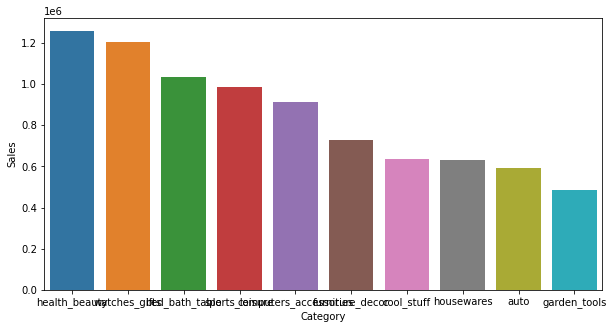

In [8]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'product_category_name_english', y='price', data=sales_catg)
ax.set_xlabel('Category')
ax.set_ylabel('Sales')
plt.show()


In [54]:
per_month = deli['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = deli[['order_id']].groupby(per_month).count()[3:23].reset_index()
orders_per_month

,order_purchase_timestamp,order_id
0,2017-01,955
1,2017-02,1951
2,2017-03,3000
3,2017-04,2684
4,2017-05,4136
5,2017-06,3583
6,2017-07,4519
7,2017-08,4910
8,2017-09,4831
9,2017-10,5322


In [85]:
orders_per_month["order_purchase_timestamp"]


0     2017-01
1     2017-02
2     2017-03
3     2017-04
4     2017-05
5     2017-06
6     2017-07
7     2017-08
8     2017-09
9     2017-10
10    2017-11
11    2017-12
12    2018-01
13    2018-02
14    2018-03
15    2018-04
16    2018-05
17    2018-06
18    2018-07
19    2018-08
Name: order_purchase_timestamp, dtype: period[M]

# 1. Lượng đơn hàng theo tháng

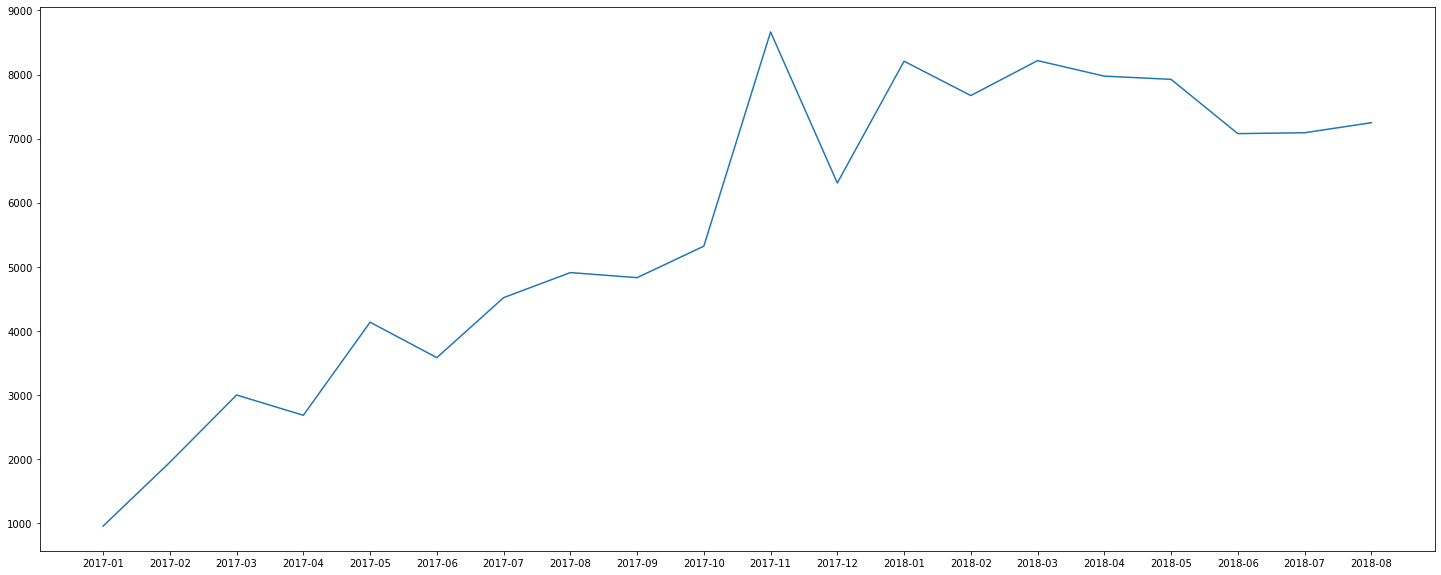

In [56]:
plt.figure(figsize=(25,10))
plt.plot(orders_per_month["order_purchase_timestamp"].index, orders_per_month["order_id"])
plt.xticks(ticks = range(len(orders_per_month)), labels = orders_per_month["order_purchase_timestamp"])
plt.show()

# 2. Thời gian vận chuyển và điểm đánh giá

In [12]:
orders['delivery_in_days'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
orders['delivery_in_days'] = orders['delivery_in_days'].apply(lambda x: x.total_seconds())
orders['delivery_in_days'] = round((orders['delivery_in_days']/3600)/24, 2)

In [13]:
orders_rv = pd.merge(
    left = orders,
    right = rv,
    on = "order_id",
    how ="left"
)
orders_rv.head(5)

,order_id,order_item_id,customer_unique_id,product_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value,delivery_in_days,review_id,review_score,review_comment_message,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,58.90,13.29,72.19,7.61,97ca439bc427b48bc1cd7177abe71365,5,"Perfeito, produto entregue antes do combinado.",2017-09-21
1,00018f77f2f0320c557190d7a144bdd3,1,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,239.90,19.93,259.83,16.22,7b07bacd811c4117b742569b04ce3580,4,NaN,2017-05-13
2,000229ec398224ef6ca0657da4fc703e,1,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,199.00,17.87,216.87,7.95,0c5b33dea94867d1ac402749e5438e8b,5,Chegou antes do prazo previsto e o produto sur...,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,1,af861d436cfc08b2c2ddefd0ba074622,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,12.99,12.79,25.78,6.15,f4028d019cb58564807486a6aaf33817,4,NaN,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,64b576fb70d441e8f1b2d7d446e483c5,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,199.90,18.14,218.04,25.11,940144190dcba6351888cafa43f3a3a5,5,Gostei pois veio no prazo determinado .,2017-03-02


In [14]:
orders_rv.review_score = orders_rv.review_score.apply(lambda x: round(x))

In [15]:
orders_rv.head()

,order_id,order_item_id,customer_unique_id,product_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value,delivery_in_days,review_id,review_score,review_comment_message,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,58.90,13.29,72.19,7.61,97ca439bc427b48bc1cd7177abe71365,5,"Perfeito, produto entregue antes do combinado.",2017-09-21
1,00018f77f2f0320c557190d7a144bdd3,1,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,239.90,19.93,259.83,16.22,7b07bacd811c4117b742569b04ce3580,4,NaN,2017-05-13
2,000229ec398224ef6ca0657da4fc703e,1,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,199.00,17.87,216.87,7.95,0c5b33dea94867d1ac402749e5438e8b,5,Chegou antes do prazo previsto e o produto sur...,2018-01-23
3,00024acbcdf0a6daa1e931b038114c75,1,af861d436cfc08b2c2ddefd0ba074622,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,12.99,12.79,25.78,6.15,f4028d019cb58564807486a6aaf33817,4,NaN,2018-08-15
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,64b576fb70d441e8f1b2d7d446e483c5,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,199.90,18.14,218.04,25.11,940144190dcba6351888cafa43f3a3a5,5,Gostei pois veio no prazo determinado .,2017-03-02


In [16]:
orders_rv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113322 entries, 0 to 113321
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113322 non-null  object        
 1   order_item_id                  113322 non-null  int64         
 2   customer_unique_id             113322 non-null  object        
 3   product_id                     113322 non-null  object        
 4   seller_id                      113322 non-null  object        
 5   order_status                   113322 non-null  object        
 6   order_purchase_timestamp       113322 non-null  datetime64[ns]
 7   order_delivered_customer_date  110847 non-null  datetime64[ns]
 8   order_estimated_delivery_date  113322 non-null  datetime64[ns]
 9   price                          113322 non-null  float64       
 10  freight_value                  113322 non-null  float64       
 11  

In [17]:
delitime_rv_df = orders_rv[(orders_rv.review_score.isnull() == False) & (orders_rv.delivery_in_days.isnull() ==False)][['delivery_in_days', 'review_score']]
delitime_rv_df.head()

,delivery_in_days,review_score
0,7.61,5
1,16.22,4
2,7.95,5
3,6.15,4
4,25.11,5


Text(0, 0.5, 'Time To Delivery (in Days)')

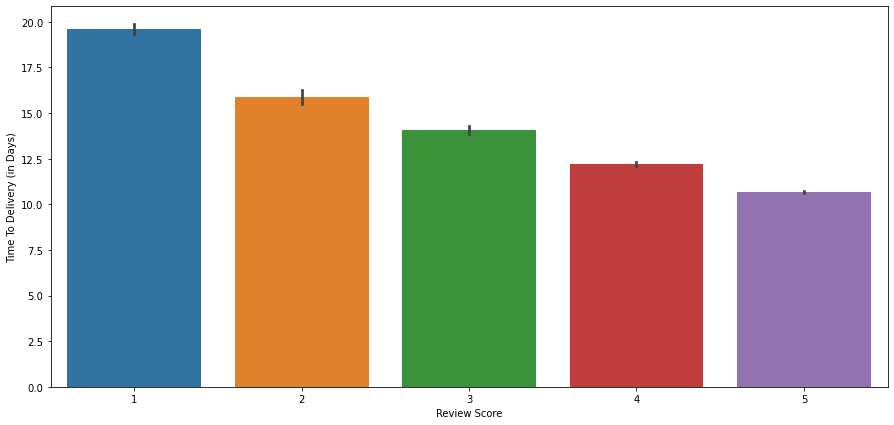

In [18]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="review_score", y="delivery_in_days", data=delitime_rv_df)
ax.set_xlabel("Review Score")
ax.set_ylabel("Time To Delivery (in Days)")

# 3. Tỉ lệ khách hàng tạo ra phần lớn doanh thu

In [19]:
top_customers = orders[['customer_unique_id', 'payment_value']].groupby('customer_unique_id').sum().sort_values('payment_value', ascending=False).reset_index()
top_customers.rename(columns={'payment_value': 'total_paid'}, inplace = True)
top_customers.head()

,customer_unique_id,total_paid
0,0a0a92112bd4c708ca5fde585afaa872,109312.64
1,698e1cf81d01a3d389d96145f7fa6df8,45256.00
2,c402f431464c72e27330a67f7b94d4fb,44048.00
3,4007669dec559734d6f53e029e360987,36489.24
4,ef8d54b3797ea4db1d63f0ced6a906e9,30186.00


In [20]:
top_customers['Percentage of Total Sales'] = (top_customers['total_paid'] / top_customers['total_paid'].sum()) *100
top_customers['Cummulative percentage of Total Sales'] = top_customers['Percentage of Total Sales'].cumsum()
top_customers['Cummulative percentage of Total Sales']

0          0.538270
1          0.761117
2          0.978015
3          1.157693
4          1.306333
            ...    
95415     99.999850
95416     99.999903
95417     99.999953
95418    100.000000
95419    100.000000
Name: Cummulative percentage of Total Sales, Length: 95420, dtype: float64

Text(42000, 70, '40000 customers (about 42% of total customers)\n contribute to approximately 80% of total sales')

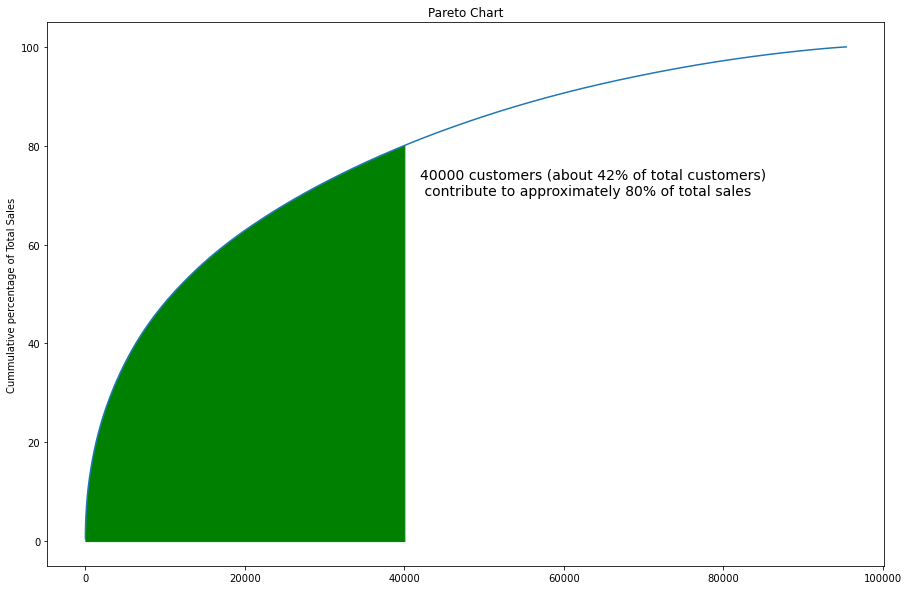

In [21]:
plt.figure(figsize= (15,10))
ax = sns.lineplot(x= range(len(top_customers)), y = 'Cummulative percentage of Total Sales', data = top_customers)
ax.set_title('Pareto Chart')
a= np.arange(1, len(top_customers)+1)
b = top_customers['Cummulative percentage of Total Sales']
plt.fill_between(
    a, 
    b,
    where = (a>=0) & (a<=40000),
    color='green')
ax.text(42000, 70, "40000 customers (about 42% of total customers)\n contribute to approximately 80% of total sales", fontsize=14)

# 4. Số lượng đánh giá tiêu cực theo từng tháng

In [22]:
neg_rv = orders_rv[(orders_rv.review_score == 1)|(orders_rv.review_score == 2)][['review_id', 'order_id', 'review_score', 'review_creation_date', 'order_purchase_timestamp']]
neg_rv['order_monthyear'] = neg_rv['order_purchase_timestamp'].dt.to_period('M')
neg_rv_per_month = neg_rv.groupby(neg_rv['order_monthyear']).count()['review_id'].reset_index().sort_values('order_monthyear',  ascending= True)

In [23]:
neg_rv_per_month



,order_monthyear,review_id
0,2016-09,6
1,2016-10,107
2,2017-01,155
3,2017-02,297
4,2017-03,450
5,2017-04,461
6,2017-05,564
7,2017-06,489
8,2017-07,625
9,2017-08,626


<AxesSubplot:xlabel='order_monthyear', ylabel='review_id'>

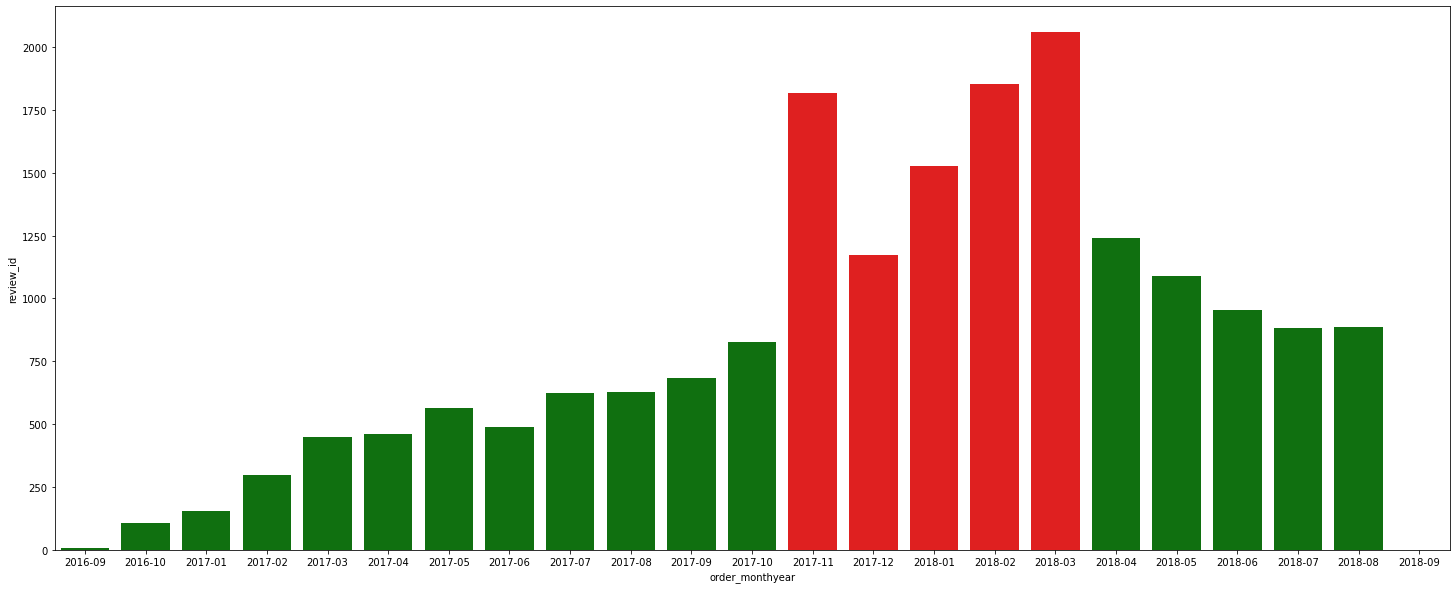

In [24]:
colors = []
for i in range(0, neg_rv_per_month.shape[0]):
    if i < 12:
        colors.append('green')
    elif i < 17:
        colors.append('red')
    else:
        colors.append('green')
plt.figure(figsize=(25,10))
sns.barplot(
    data=neg_rv_per_month,
    x = 'order_monthyear',
    y = 'review_id',
    palette=colors
)

# 5. Trong các khách hàng đánh giá chiếm 80%, các điểm số đánh giá là như nào

# 6. Tình trạng ship trễ và các ngày trong tuần

In [25]:
ord_shipping_stt = orders_rv[orders_rv.order_status == 'delivered'][['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date','order_estimated_delivery_date']]
ord_shipping_stt.head()

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17


In [26]:
ord_shipping_stt['gap'] = (ord_shipping_stt['order_estimated_delivery_date'] - ord_shipping_stt['order_delivered_customer_date'])
# orders['delivery_in_days'] = orders['delivery_in_days'].apply(lambda x: x.total_seconds())
ord_shipping_stt['gap'] = ord_shipping_stt['gap'].apply(lambda x: x.days)
def shipping_late(gap):
    if gap >= 0:
        return 0
    else: 
        return 1
ord_shipping_stt['late'] = ord_shipping_stt['gap'].apply(shipping_late)
ord_shipping_stt.head()

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,gap,late
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,8.0,0
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,2.0,0
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,13.0,0
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,5.0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,15.0,0


In [27]:
ord_shipping_stt_plt = ord_shipping_stt[ord_shipping_stt.late == 1][['order_estimated_delivery_date', 'late']]
ord_shipping_stt_plt.head()

,order_estimated_delivery_date,late
8,2018-03-29,1
11,2018-08-07,1
21,2017-12-07,1
39,2017-05-19,1
47,2017-12-14,1


In [28]:
ord_shipping_stt_plt['per_quarter'] = ord_shipping_stt_plt['order_estimated_delivery_date'].dt.quarter
ord_shipping_stt_plt_count = ord_shipping_stt_plt.groupby(ord_shipping_stt_plt['per_quarter']).sum()['late'].reset_index()
ord_shipping_stt_plt_count.head()

,per_quarter,late
0,1,2874
1,2,2575
2,3,1605
3,4,1709


[Text(0, 0, 'Spring'),
 Text(1, 0, 'Summner'),
 Text(2, 0, 'Fall'),
 Text(3, 0, 'Winter')]

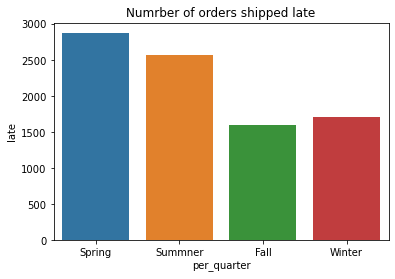

In [29]:
ax = sns.barplot(x= 'per_quarter', y= 'late', data = ord_shipping_stt_plt_count)
ax.set_title('Numrber of orders shipped late')
ax.set_xticklabels(['Spring','Summner','Fall', 'Winter'])

# 7. Điểm đánh giá trung bình theo thời gian (tháng)

In [80]:
rv_mean_per_month = rv.groupby(rv['review_creation_date'].dt.to_period('M')).mean()[3:23].reset_index()
rv_mean_per_month

,review_creation_date,review_score
0,2017-01,4.338912
1,2017-02,4.269663
2,2017-03,4.012774
3,2017-04,4.025641
4,2017-05,4.086456
5,2017-06,4.109290
6,2017-07,4.167610
7,2017-08,4.213104
8,2017-09,4.164939
9,2017-10,4.170112


([<matplotlib.axis.XTick at 0x1da584b4430>,
 [Text(0, 0, '2017-01'),
  Text(1, 0, '2017-02'),
  Text(2, 0, '2017-03'),
  Text(3, 0, '2017-04'),
  Text(4, 0, '2017-05'),
  Text(5, 0, '2017-06'),
  Text(6, 0, '2017-07'),
  Text(7, 0, '2017-08'),
  Text(8, 0, '2017-09'),
  Text(9, 0, '2017-10'),
  Text(10, 0, '2017-11'),
  Text(11, 0, '2017-12'),
  Text(12, 0, '2018-01'),
  Text(13, 0, '2018-02'),
  Text(14, 0, '2018-03'),
  Text(15, 0, '2018-04'),
  Text(16, 0, '2018-05'),
  Text(17, 0, '2018-06'),
  Text(18, 0, '2018-07'),
  Text(19, 0, '2018-08')])

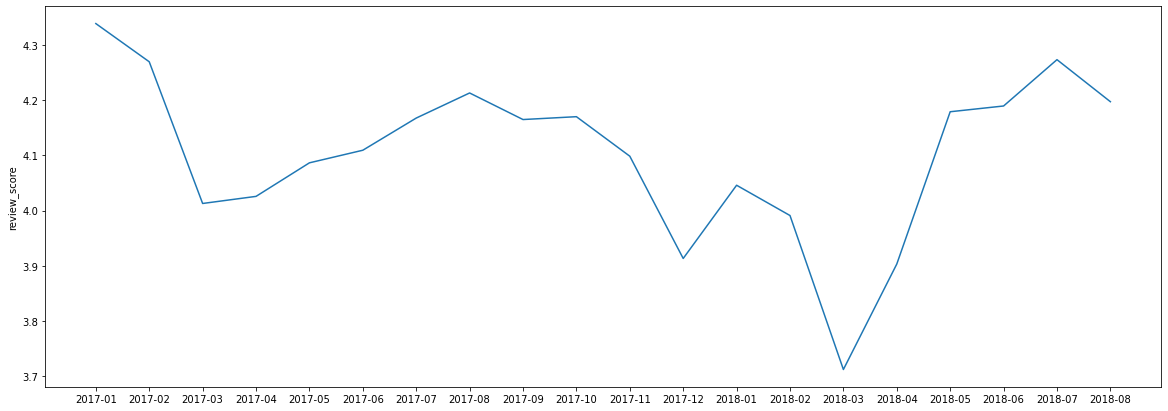

In [89]:
plt.figure(figsize=(20,7))
ax = sns.lineplot(data=rv_mean_per_month, x= rv_mean_per_month['review_creation_date'].index, y= 'review_score')
plt.xticks(ticks = range(len(rv_mean_per_month)), labels = rv_mean_per_month["review_creation_date"])

In [72]:
rv_mean_per_month['review_creation_date'].index

RangeIndex(start=0, stop=20, step=1)